In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import re
import nltk
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [3]:
# working on first 10000 rows
zomato_real=pd.read_csv(r"C:\Desktop\zomato.csv", nrows=10000)
zomato_real.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
# Deleting Unnnecessary Columns
zomato=zomato_real.drop(['url','dish_liked','phone'],axis=1)

In [5]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      10000 non-null  object
 1   name                         10000 non-null  object
 2   online_order                 10000 non-null  object
 3   book_table                   10000 non-null  object
 4   rate                         8628 non-null   object
 5   votes                        10000 non-null  int64 
 6   location                     9998 non-null   object
 7   rest_type                    9949 non-null   object
 8   cuisines                     9990 non-null   object
 9   approx_cost(for two people)  9980 non-null   object
 10  reviews_list                 10000 non-null  object
 11  menu_item                    10000 non-null  object
 12  listed_in(type)              10000 non-null  object
 13  listed_in(city)              100

In [7]:
# Removing the Duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

In [8]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [9]:
zomato.describe()

,votes
count,9989.000000
mean,245.732806
std,712.241891
min,0.000000
25%,7.000000
50%,41.000000
75%,178.000000
max,16345.000000


In [10]:
#Remove the NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)

In [11]:
#Changing the column names
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'list_type', 'listed_in(city)':'city'})

In [12]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,list_type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [13]:
# Changing the cost to string
zomato['cost'] = zomato['cost'].astype(str)
# Using lambda function to replace ',' from cost
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.'))
zomato['cost'] = zomato['cost'].astype(float)

In [14]:
# Removing '/5' from Rates
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')


In [15]:
# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)

In [16]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,list_type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [17]:
# Computing Mean Rating
restaurants = list(zomato['name'].unique())
zomato['Mean Rating'] = 0

In [18]:
for i in range(len(restaurants)):
    zomato['Mean Rating'][zomato['name'] == restaurants[i]] = zomato['rate'][zomato['name'] == restaurants[i]].mean()

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,5))
zomato[['Mean Rating']] = scaler.fit_transform(zomato[['Mean Rating']]).round(2)

In [20]:
def clean_text(text):
    """Cleans a text string by removing punctuation, stopwords, and URLs."""

    # Convert the text to lowercase
    text = text.lower()

    # Remove punctuation
    punctuation = string.punctuation
    text = text.translate(str.maketrans('', '', punctuation))

    # Remove stopwords
    stopwords = set(nltk.corpus.stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stopwords])

    # Remove URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(r'', text)

    return text

zomato["reviews_list"] = zomato["reviews_list"].apply(clean_text)

zomato[['reviews_list', 'cuisines']].sample(5)


,reviews_list,cuisines
4699,rated 50 ratedn one favorite places order cake...,"Bakery, Fast Food"
6479,rated 50 ratedn visit place days back palm mea...,"Continental, North Indian"
866,rated 40 ratedn go dosas south indian breakfas...,"South Indian, North Indian, Chinese"
4487,rated 10 ratedn received order yet showing ord...,"Street Food, South Indian"
3995,rated 40 ratedn team lunch loved taste varieti...,"Chinese, Thai, Indonesian"


In [21]:
def get_top_words(column, top_n, ngram_range=(1, 2)):
    """Returns the top n most frequent words in a column, using n-grams of the specified range.

    Args:
        column: A pandas Series of text.
        top_n: The number of top words to return.
        ngram_range: The range of n-grams to consider.

    Returns:
        A list of tuples, where each tuple contains a word and its frequency.
    """

    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    bag_of_words = vectorizer.fit_transform(column)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_n]

# Drop the columns we don't need
zomato = zomato.drop(['address', 'rest_type', 'list_type', 'menu_item', 'votes'], axis=1)

# Randomly sample 60% of the data
df_percent = zomato.sample(frac=0.6)

# Get the top 10 most frequent words
top_words = get_top_words(df_percent['reviews_list'], 10)

# Print the top 10 most frequent words
print(top_words)


[('rated', 128260), ('ratedn', 127622), ('good', 82343), ('food', 81619), ('place', 81073), ('x82ã', 47900), ('x83ã', 38257), ('50', 36587), ('rated 50', 36231), ('50 ratedn', 36166)]


In [22]:
#TF-IDF
df_percent.set_index('name', inplace=True)

In [23]:
indices = pd.Series(df_percent.index)

In [24]:
# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')

In [25]:
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])

In [26]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [27]:
def recommend(name, cosine_similarities = cosine_similarities):

    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]

    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    top30_indexes = cosine_similarities[idx].argsort()[-30:][::-1]

    # Names of the top 30 restaurants
    recommend_restaurant = list(df_percent.index[top30_indexes])

    # Creating the new data set to show similar restaurants
    df_new = df_percent[['cuisines','Mean Rating', 'cost']].loc[recommend_restaurant]

    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines','Mean Rating', 'cost'], keep=False).sort_values(by='Mean Rating', ascending=False).head(10)

    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))

    return df_new

recommend('Jalsa')


TOP 10 RESTAURANTS LIKE Jalsa WITH SIMILAR REVIEWS: 


,cuisines,Mean Rating,cost
name,,,
Brew And Barbeque - A Microbrewery Pub,"Continental, North Indian, BBQ, Steak",4.74,1.4
Jalsa Gold,"North Indian, Mughlai, Italian",4.48,1.3
Gilly'S Restobar,"Finger Food, Continental, North Indian",4.40,1.0
Xoox Brewmill,"Modern Indian, European, Asian",4.35,2.0
Brooks And Bonds Brewery,"Continental, Mediterranean, North Indian, Chin...",4.35,1.6
Dhaba Estd 1986 Delhi,North Indian,4.35,1.1
CafãÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Felix,"American, Cafe, Continental",4.35,1.7
Boho,"Continental, Asian, American, North Indian, De...",4.10,1.2
Jalsa,"North Indian, Mughlai",3.99,1.5


In [28]:
recommend('Jalsa')

TOP 10 RESTAURANTS LIKE Jalsa WITH SIMILAR REVIEWS: 


,cuisines,Mean Rating,cost
name,,,
Brew And Barbeque - A Microbrewery Pub,"Continental, North Indian, BBQ, Steak",4.74,1.4
Jalsa Gold,"North Indian, Mughlai, Italian",4.48,1.3
Gilly'S Restobar,"Finger Food, Continental, North Indian",4.40,1.0
Xoox Brewmill,"Modern Indian, European, Asian",4.35,2.0
Brooks And Bonds Brewery,"Continental, Mediterranean, North Indian, Chin...",4.35,1.6
Dhaba Estd 1986 Delhi,North Indian,4.35,1.1
CafãÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Felix,"American, Cafe, Continental",4.35,1.7
Boho,"Continental, Asian, American, North Indian, De...",4.10,1.2
Jalsa,"North Indian, Mughlai",3.99,1.5


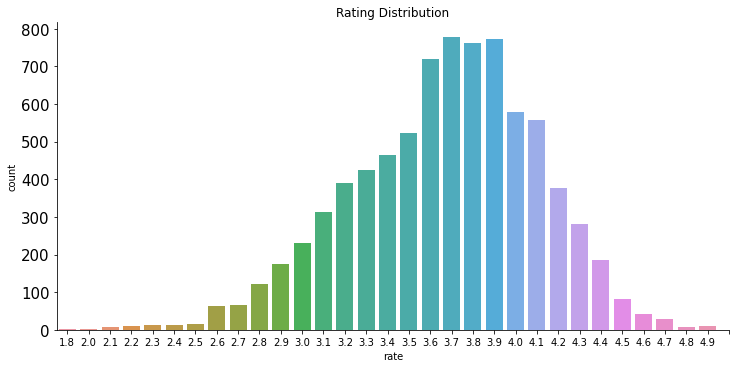

In [29]:
import seaborn as sns
sns.catplot(data=zomato, x='rate', kind='count', aspect=2)
ax = plt.gca()
ax.set(xticks=range(0, 32), title='Rating Distribution')
ax.tick_params('x', labelsize=10)
ax.tick_params('y', labelsize=15)

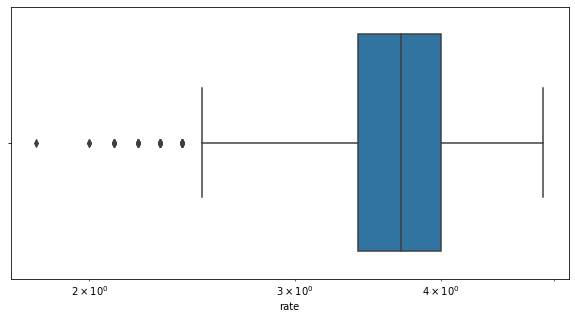

In [30]:
plt.figure(figsize=(10,5))
ax = plt.gca()
sns.boxplot(data=zomato, x='rate', ax=ax)
plt.xscale('log')

In [31]:
# Create a word cloud
from wordcloud import WordCloud
all_words = ' '.join([text for text in zomato['reviews_list']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
all_words = ' '.join([text for text in zomato['cuisines']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
all_words = ' '.join([text for text in zomato['location']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Finding the locations with the most number of retaurants 

zomato.location.value_counts().nlargest(10).plot(kind='barh')
plt.title("Number of restaurants by location")
plt.xlabel("Restaurant counts")
plt.show()
#From the barchart it can be seen that BTM has the most number of restaurants

In [ ]:
# Finding how many people order online 
import plotly.offline as py
trace = go.Pie(labels = ['Online_orders', 'No_online_orders'], values = zomato['online_order'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['silver','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of order variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)
#From the pie chart it can be seen that people order online more than going out

In [ ]:
sns.countplot(x = zomato['rate'], hue = zomato['online_order'], palette= 'Set2')
plt.title("Distribution of restaurant rating over online order facility")
plt.show()
#This plot shows that rating clearly depends on the online ordering facility provision, restaurants with online facilities have a higher rating

In [ ]:
zomato.name.value_counts().nlargest(20).plot(kind = 'barh')
plt.legend()
plt.show()
#Cafe coffee day is the most popular restaurant in Bangalore

In [ ]:
# Plotting a pie chart for online orders

trace = go.Pie(labels = ['Table_booking_available', 'No_table_booking_available'], values = zomato['book_table'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['silver','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of order variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)
#87.5% of the restaurants have online table booking(reservation) facilities

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x = zomato['online_order'], hue = zomato['rate'], palette= 'Set2')
plt.title("Distribution of restaurant rating over table booking facility")
plt.show()
#The distribution below clearly shows that ratings depend on online table booking facility. The restaurants with the online reservation facility have a higher rating

In [ ]:
plt.rcParams['figure.figsize'] = 14,7
plt.subplot(1,2,1)

zomato.name.value_counts().head().plot(kind = 'barh', color = sns.color_palette("hls", 5))
plt.xlabel("Number Of Restaurants")
plt.title("Biggest Restaurant Chain (Top 5)")

plt.subplot(1,2,2)

zomato[zomato['rate'] >= 4.5]['name'].value_counts().nlargest(5).plot(kind = 'barh', color = sns.color_palette("Paired"))
plt.xlabel("Number Of Restaurants")
plt.title("Biggest Restaurant Chain (Top 5) - Rating more than 4.5")
plt.tight_layout()
'''
The bigger chained restaurants in Bangalore do not necessarily have the highest rating. Cafe coffee day has almost 
100 cafes while truffles has just over 40. Truffles has a higher rating than cafe coffee day
Therefore, quality over quantity
'''

In [ ]:
sns.heatmap(zomato.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [ ]:
# Doing some ML stuff

In [33]:

zomato['online_order']= pd.get_dummies(zomato['online_order'], drop_first=True)

In [34]:
zomato['book_table'] = pd.get_dummies(zomato['book_table'], drop_first=True)

In [35]:
# One Hot Encoding

get_dummies_location = pd.get_dummies(zomato.location)
get_dummies_location.head(3)

,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Bommanahalli,Brigade Road,Brookefield,Central Bangalore,Church Street,...,Shivajinagar,South Bangalore,St. Marks Road,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,Whitefield,Wilson Garden
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
ml = pd.concat([zomato, get_dummies_location], axis = 1)
ml.head(2)

,name,online_order,book_table,rate,location,cuisines,cost,reviews_list,city,Mean Rating,...,Shivajinagar,South Bangalore,St. Marks Road,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,Whitefield,Wilson Garden
0,Jalsa,1,1,4.1,Banashankari,"North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,Banashankari,3.99,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,1,0,4.1,Banashankari,"Chinese, North Indian, Thai",800.0,rated 40 ratedn dinner family turned good choo...,Banashankari,3.97,...,0,0,0,0,0,0,0,0,0,0


In [37]:
ml = ml.drop(["name","location", 'cuisines', 'reviews_list', 'city'],axis = 1)
ml.head()

,online_order,book_table,rate,cost,Mean Rating,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,...,Shivajinagar,South Bangalore,St. Marks Road,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,Whitefield,Wilson Garden
0,1,1,4.1,800.0,3.99,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,800.0,3.97,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,800.0,3.58,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,300.0,3.45,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3.8,600.0,3.58,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#splitting into indep
x = ml.drop(['rate'], axis = 1)
x.head()

,online_order,book_table,cost,Mean Rating,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Bommanahalli,...,Shivajinagar,South Bangalore,St. Marks Road,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,Whitefield,Wilson Garden
0,1,1,800.0,3.99,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,800.0,3.97,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,800.0,3.58,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,300.0,3.45,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,600.0,3.58,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#dependent
y = ml['rate']
y.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [40]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [41]:
print(model.feature_importances_)

[ 5.21599009e-03  8.79370061e-02  2.11497458e-02  8.48352018e-01
  1.17852299e-03  2.12382013e-03  2.85873571e-03  1.54759651e-03
  1.72604950e-03  6.42615317e-05  1.46668642e-03  1.49632556e-03
  2.46382452e-17  4.78923765e-04  2.77673414e-05  8.56796396e-05
  6.75060821e-04  2.00260012e-04  6.12812345e-17  1.26862493e-16
 -1.02096487e-17  9.18427765e-04  1.23091359e-03  4.54886670e-17
  5.20504665e-04  9.28121875e-04  9.11050206e-06  1.92789026e-03
  1.83489937e-03  2.13865662e-17  6.24622947e-06  4.36978733e-05
  5.91456434e-05  5.10492143e-04  3.14680901e-17  6.52968617e-06
  1.72190915e-04  3.48483793e-03  2.93231473e-04  1.17573370e-03
  2.49918203e-04  1.22428839e-04  6.94372177e-05  3.66696421e-04
  2.22752827e-04  7.47809316e-05  2.57050917e-03  2.03105821e-05
  2.94007543e-06  2.15031928e-17  1.22066837e-04  1.47973328e-05
  3.52242483e-04  3.97961272e-04  1.39013397e-03  1.07056294e-04
  4.54828269e-04  7.59239257e-08  1.09194478e-04  4.35575255e-04
  3.85563201e-04  6.54430

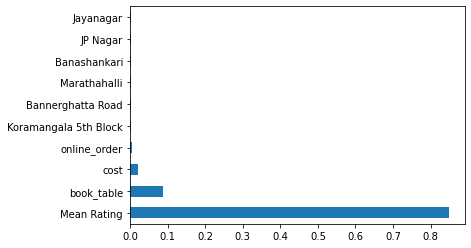

In [42]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [43]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30) #30% split

In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()



lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)

In [45]:
r2 = r2_score(y_test,lr_pred)
print('R-Square: ',r2*100)


lr_errors = abs(lr_pred - y_test)
print('Error MEAN ABSOLUTE: ', round(np.mean(lr_pred), 2), ' in degrees')


mape = 100 * (lr_errors / y_test)


lr_accuracy = 100 - np.mean(mape)
print('LR ACCURACY: ', round(lr_accuracy, 2), '%')

R-Square:  89.9375509053027
Error MEAN ABSOLUTE:  3.67  in degrees
LR ACCURACY:  98.16 %


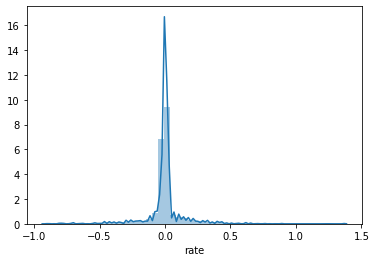

In [46]:
sns.distplot(y_test-lr_pred)

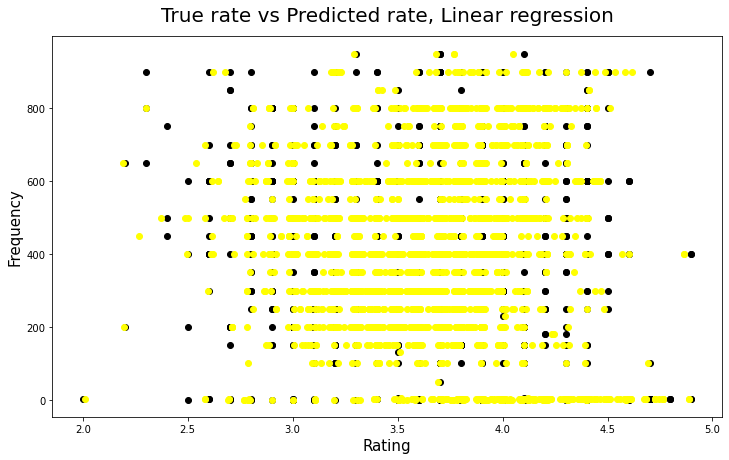

In [47]:
plt.figure(figsize=(12,7))

plt.scatter(y_test,x_test.iloc[:,2],color="black")
plt.title("True rate vs Predicted rate, Linear regression",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Frequency',size = 15)
plt.scatter(lr_pred,x_test.iloc[:,2],color="yellow")

In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print('MAE :',metrics.mean_absolute_error(y_test, lr_pred))

MAE : 0.0644128892652477


In [49]:
print('MSE: ',metrics.mean_squared_error(y_test, lr_pred))


MSE:  0.018905754245237667
